
--- Dataset Overview ---
Training set: 60000 images
Test set: 10000 images
Image dimensions: 28x28 pixels
Number of classes: 10
Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


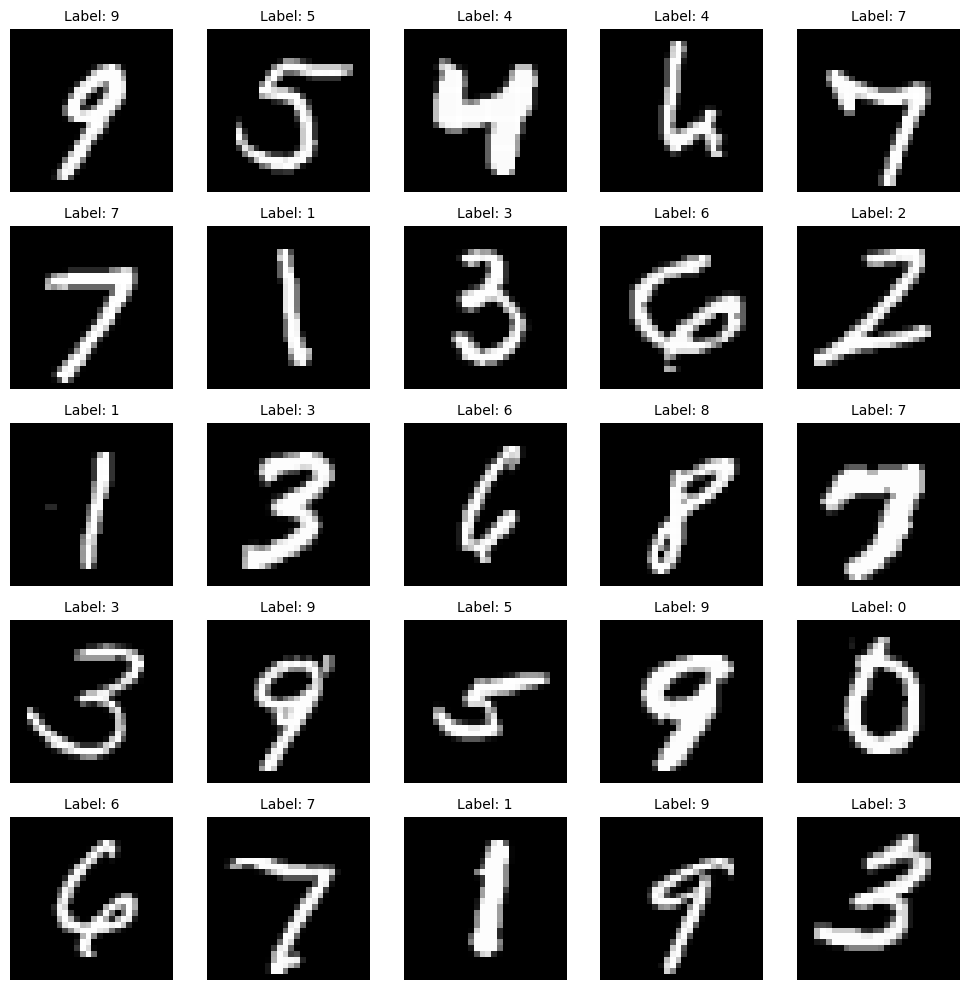


--- Class Distribution (Training Set) ---
'0': 5923 samples
'1': 6742 samples
'2': 5958 samples
'3': 6131 samples
'4': 5842 samples
'5': 5421 samples
'6': 5918 samples
'7': 6265 samples
'8': 5851 samples
'9': 5949 samples


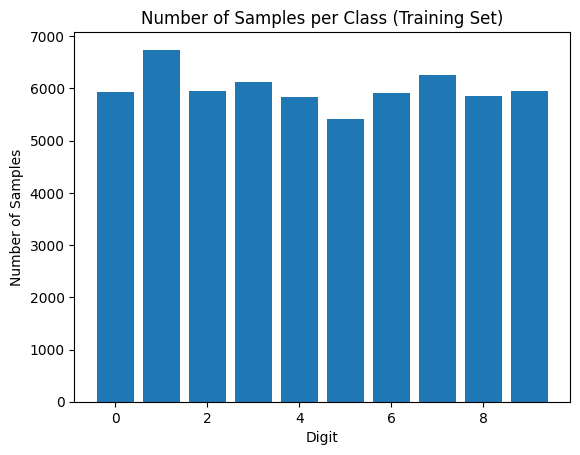

In [1]:
# data_exploration.ipynb (updated for MNIST)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# --- 1. Load MNIST dataset ---
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape images for consistency
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = np.expand_dims(X_train, axis=-1)  # shape: (60000, 28, 28, 1)
X_test = np.expand_dims(X_test, axis=-1)    # shape: (10000, 28, 28, 1)

# One-hot encode labels if needed
num_classes = 10
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

char_map = [str(i) for i in range(num_classes)]

print("\n--- Dataset Overview ---")
print(f"Training set: {X_train.shape[0]} images")
print(f"Test set: {X_test.shape[0]} images")
print(f"Image dimensions: {X_train.shape[1]}x{X_train.shape[2]} pixels")
print(f"Number of classes: {num_classes}")
print(f"Classes: {char_map}")

# --- 2. Visualize a sample of images ---
def visualize_samples(images, labels, char_map, num_samples=25):
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    axes = axes.flatten()
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    
    for i, idx in enumerate(indices):
        ax = axes[i]
        ax.imshow(images[idx].squeeze(), cmap='gray')
        ax.set_title(f"Label: {char_map[labels[idx]]}", fontsize=10)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

visualize_samples(X_train, y_train, char_map)

# --- 3. Check class distribution ---
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("\n--- Class Distribution (Training Set) ---")
for key, value in class_distribution.items():
    print(f"'{char_map[key]}': {value} samples")

plt.bar(class_distribution.keys(), class_distribution.values())
plt.title("Number of Samples per Class (Training Set)")
plt.xlabel("Digit")
plt.ylabel("Number of Samples")
plt.show()
